In [89]:
from gensim import models

file_f = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/fakta_final.txt').read()
file_h = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/hoax_final.txt').read()

list_f = file_f.split()
list_h = file_h.split()

sentence = models.doc2vec.LabeledSentence(
    words=list_f, tags=["SENT_fakta"])
sentence1 = models.doc2vec.LabeledSentence(
    words=list_h, tags=["SENT_hoax"])

sentences = [sentence, sentence1]
token_count = sum([len(sentence) for sentence in sentences])

class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])
            
model = models.Doc2Vec(dm=0, alpha=.025, min_alpha=.025, min_count=1)
model.build_vocab(sentences)

for epoch in range(10):
    model.train(sentences, total_examples = token_count, epochs = model.iter)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay

model.save("my_model.doc2vec")
model_loaded = models.Doc2Vec.load('my_model.doc2vec')

print(model.docvecs.most_similar(["SENT_hoax"]))
print(model.docvecs.most_similar(["SENT_fakta"]))
#print(model_loaded.docvecs.most_similar(["SENT_hoax"]))
#print(model.docvecs["SENT_hoax"])

#word_vec = model['pesan']
#model.docvecs.most_similar([word_vec])

#print(model.docvecs["SENT_fakta"])


[('SENT_fakta', 0.13616332411766052)]
[('SENT_hoax', 0.13616332411766052)]


In [90]:
cosine_similarities = []
for r in range(2):
    for t in range(r+1, 2):
        cosine_similarities.append(model.docvecs.similarity(r,t))
        print(cosine_similarities)
min(cosine_similarities)

[0.13616332094025124]


0.13616332094025124

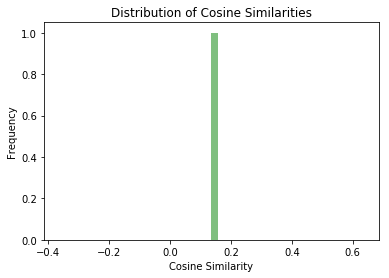

In [91]:
import matplotlib.pyplot as plt
plt.hist(cosine_similarities, 50, facecolor='green', alpha=0.5)
plt.title('Distribution of Cosine Similarities')
plt.ylabel('Frequency')
plt.xlabel('Cosine Similarity')
plt.show()
plt.savefig('similarities_hist.png')
